In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\Aman\AppData\Local\Temp\ipykernel_10756\3381811058.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("../Data/titanic.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#check missing value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
def show_missing_values():
    nulls = df.isnull()
    null_values = nulls.sum().sort_values(ascending=False)
    percentage = nulls.sum() / nulls.count()*100
    missing_values = pd.concat([null_values, percentage], axis=1, keys=['Number', 'Percentage'], sort=False)
    return missing_values[missing_values['Percentage'] != 0]
show_missing_values()

,Number,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


Data Preprocessing

In [7]:
# drop unrelevent column
columns_to_drop = ['PassengerId', 'Ticket', 'Name']
for i in columns_to_drop:
    df.drop(i, axis=1, inplace=True)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


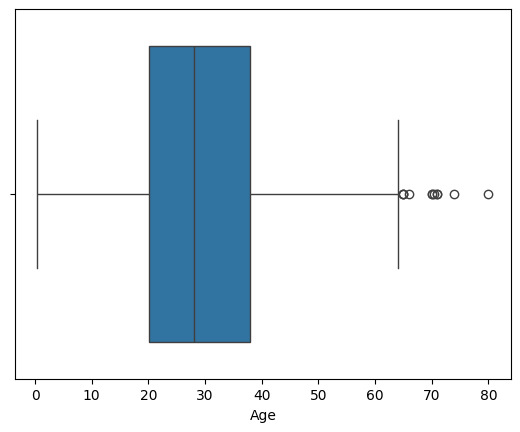

In [9]:
sns.boxplot(x=df["Age"])
plt.show()

In [10]:
mode_value = df["Age"].mode()[0]
df["Age"] = df["Age"].fillna(mode_value)

In [11]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Define the acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["Age"] >= lower_bound) & (df["Age"] <= upper_bound)]

13.0


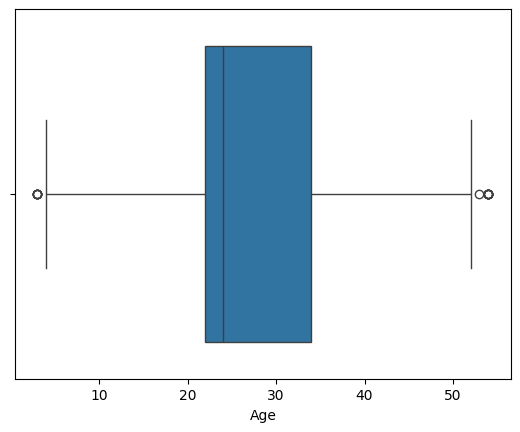

In [13]:
sns.boxplot(x=df["Age"])
plt.show()

In [14]:
df2 = df.drop_duplicates()

In [15]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [16]:
df3 = df2.drop("Cabin", axis=1)

In [17]:
df3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [18]:
def create_categorical_feature(dataset, column_to_modify):
    categorical = pd.get_dummies(dataset[column_to_modify], prefix=column_to_modify)
    dataset.drop(column_to_modify, axis=1, inplace=True)
    dataset = pd.concat([dataset, categorical], axis=1)
    return dataset

In [19]:
df4 = create_categorical_feature(df3, "Pclass")
df4.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3
0,0,male,22.0,1,0,7.2500,S,False,False,True
1,1,female,38.0,1,0,71.2833,C,True,False,False
2,1,female,26.0,0,0,7.9250,S,False,False,True
3,1,female,35.0,1,0,53.1000,S,True,False,False
4,0,male,35.0,0,0,8.0500,S,False,False,True


In [20]:
df5 = create_categorical_feature(df4, "Embarked")
df5.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,male,22.0,1,0,7.2500,False,False,True,False,False,True
1,1,female,38.0,1,0,71.2833,True,False,False,True,False,False
2,1,female,26.0,0,0,7.9250,False,False,True,False,False,True
3,1,female,35.0,1,0,53.1000,True,False,False,False,False,True
4,0,male,35.0,0,0,8.0500,False,False,True,False,False,True


In [21]:
pd.qcut(df['Fare'], 5).value_counts()

Fare
(-0.001, 7.854]      174
(10.485, 20.25]      166
(39.618, 512.329]    165
(20.25, 39.618]      164
(7.854, 10.485]      156
Name: count, dtype: int64

In [23]:
def convert_fares(fare): 
    if fare <= 7.854: 
        return 0
    elif fare > 7.854 and fare <= 10.5: 
        return 1
    elif fare > 10.5 and fare <= 21.679:
        return 2
    elif fare > 21.679 and fare <= 39.688: 
        return 3
    else: 
        return 4
    

df5['Fare'] = df5['Fare'].apply(lambda fare: convert_fares(fare))

In [24]:
df5.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,male,22.0,1,0,0,False,False,True,False,False,True
1,1,female,38.0,1,0,4,True,False,False,True,False,False
2,1,female,26.0,0,0,1,False,False,True,False,False,True
3,1,female,35.0,1,0,4,True,False,False,False,False,True
4,0,male,35.0,0,0,1,False,False,True,False,False,True


In [25]:
def convert_sex(sex):
    if sex == "male":
        return 1
    else:
        return 0
df5['Sex'] = df5['Sex'].apply(lambda sex: convert_sex(sex))

In [27]:
df5.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,1,22.0,1,0,0,False,False,True,False,False,True
1,1,0,38.0,1,0,4,True,False,False,True,False,False
2,1,0,26.0,0,0,1,False,False,True,False,False,True
3,1,0,35.0,1,0,4,True,False,False,False,False,True
4,0,1,35.0,0,0,1,False,False,True,False,False,True


In [31]:
def bool_to_int(val):
    return 1 if val else 0

In [30]:
df5.columns

Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [32]:
col = ["Pclass_1","Pclass_2","Pclass_3", "Embarked_C","Embarked_Q","Embarked_S"]
for i in col:
    df5[i] = df5[i].apply(lambda val: bool_to_int(val))
df5.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,1,22.0,1,0,0,0,0,1,0,0,1
1,1,0,38.0,1,0,4,1,0,0,1,0,0
2,1,0,26.0,0,0,1,0,0,1,0,0,1
3,1,0,35.0,1,0,4,1,0,0,0,0,1
4,0,1,35.0,0,0,1,0,0,1,0,0,1


In [34]:
df5.to_csv("../Data/Preprocessed_data.csv",index=False)